# Working With Pandas And Matplotlib

This problem gives you an intro to doing Data Analysis with Pandas. The question is kept sligtly open ended on in the sense that we have not provided the exact steps you should take to arrive at the answers on purpose. You can refer to the tutorial provided to you earlier for inspiration. You should arrive at all the answers by writing appropriate code, eye-balling the data and reporting answers is not allowed. 

You are given [2011 Census Data](./NDAP_REPORT_6000.csv). Your task is to clean the data and perform the perform the following tasks:

---

## Task 1

1. Show how literacy rate for males, females, and the total population differs between urban and rural areas within each state.
2. Which state has the highest disparity between urban and rural areas?
3. Also plot 2 graphs for male and female population showing combined literacy rates for each state

## Task 2

1. What is the distribution of the working population (main and marginal workers) by sector (cultivators, agricultural labourers, household industry, other workers) and gender across different states?
2. Plot a graph showing all these sectors together for top 5 states ranked by employment rate.
<br>
<br>
---

You can also plot other graphs if needed or carry out other data analysis.


In [218]:
import pandas as pd
from matplotlib import pyplot as plt

In [219]:
df = pd.read_csv('NDAP_REPORT_6000.csv')

In [220]:
df.head()

,Country,State,District,Sub-District,Village Or Town Name,Year,Residence Type,"Households (UOM:Number), Scaling Factor:1","Population (UOM:Number), Scaling Factor:1","Male Population (UOM:Number), Scaling Factor:1",...,"Number Of Female Marginal Workers As Agricultural Labour Who Worked For 0 To 3 Months (UOM:Number), Scaling Factor:1","Number Of Marginal Workers In Household Industry Who Worked For 0 To 3 Months (UOM:Number), Scaling Factor:1","Number Of Male Marginal Workers In Household Industry Who Worked For 0 To 3 Months (UOM:Number), Scaling Factor:1","Number Of Female Marginal Workers In Household Industry Who Worked For 0 To 3 Months (UOM:Number), Scaling Factor:1","Number Of Marginal Workers As Other Workers Who Worked For 0 To 3 Months (UOM:Number), Scaling Factor:1","Number Of Male Marginal Workers As Other Workers Who Worked For 0 To 3 Months (UOM:Number), Scaling Factor:1","Number Of Female Marginal Workers As Other Workers Who Worked For 0 To 3 Months (UOM:Number), Scaling Factor:1","Number Of Non Workers (UOM:Number), Scaling Factor:1","Number Of Male Non Workers (UOM:Number), Scaling Factor:1","Number Of Female Non Workers (UOM:Number), Scaling Factor:1"
0,India,Andaman And Nicobar Islands,Nicobars,Car Nicobar,Arong,"Calendar Year (Jan - Dec), 2011",Rural,233.0,1194.0,617.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,667.0,268.0,399.0
1,India,Andaman And Nicobar Islands,Nicobars,Car Nicobar,Big Lapati,"Calendar Year (Jan - Dec), 2011",Rural,271.0,1098.0,584.0,...,2.0,149.0,68.0,81.0,11.0,6.0,5.0,441.0,216.0,225.0
2,India,Andaman And Nicobar Islands,Nicobars,Car Nicobar,Chuckchucha,"Calendar Year (Jan - Dec), 2011",Rural,231.0,1021.0,536.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,734.0,292.0,442.0
3,India,Andaman And Nicobar Islands,Nicobars,Car Nicobar,Iaf Camp,"Calendar Year (Jan - Dec), 2011",Rural,31.0,731.0,723.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,7.0
4,India,Andaman And Nicobar Islands,Nicobars,Car Nicobar,Kakana,"Calendar Year (Jan - Dec), 2011",Rural,231.0,841.0,456.0,...,0.0,28.0,26.0,2.0,4.0,4.0,0.0,542.0,209.0,333.0


In [221]:
df.columns = (
    df.columns
      .str.replace(r"\s*\(UOM:Number\),\s*Scaling Factor:1", "", regex=True)
      .str.strip()
)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606573 entries, 0 to 606572
Data columns (total 92 columns):
 #   Column                                                                                 Non-Null Count   Dtype  
---  ------                                                                                 --------------   -----  
 0   Country                                                                                606573 non-null  object 
 1   State                                                                                  606573 non-null  object 
 2   District                                                                               606573 non-null  object 
 3   Sub-District                                                                           606573 non-null  object 
 4   Village Or Town Name                                                                   606573 non-null  object 
 5   Year                                                             

In [223]:
# Check if there are any missing values
df.isnull().sum()

Country                                                                            0
State                                                                              0
District                                                                           0
Sub-District                                                                       0
Village Or Town Name                                                               0
                                                                                  ..
Number Of Male Marginal Workers As Other Workers Who Worked For 0 To 3 Months      0
Number Of Female Marginal Workers As Other Workers Who Worked For 0 To 3 Months    0
Number Of Non Workers                                                              0
Number Of Male Non Workers                                                         0
Number Of Female Non Workers                                                       0
Length: 92, dtype: int64

# Task 1

##### 1. Show how literacy rate for males, females, and the total population differs between urban and rural areas within each state.

In [224]:
df['Male Literacy Rate'] = (df['Male Literate Population'] / df['Population'] * 100)
df['Female Literacy Rate'] = (df['Female Literate Population'] / df['Population'] * 100) 
df['Total Literacy Rate'] = (df['Literate Population'] / df['Population'] * 100)
print(df['Male Literacy Rate'])
print(df['Female Literacy Rate'])
print(df['Total Literacy Rate'])

0         39.782245
1         37.613843
2         36.434868
3         98.905609
4         39.833532
            ...    
606568    29.514673
606569    44.361702
606570    38.502865
606571    40.774943
606572    39.223818
Name: Male Literacy Rate, Length: 606573, dtype: float64
0         34.505863
1         29.417122
2         29.872674
3          0.820793
4         26.634958
            ...    
606568    18.566591
606569    31.914894
606570    28.556079
606571    32.738071
606572    29.768006
Name: Female Literacy Rate, Length: 606573, dtype: float64
0         74.288107
1         67.030965
2         66.307542
3         99.726402
4         66.468490
            ...    
606568    48.081264
606569    76.276596
606570    67.058944
606571    73.513013
606572    68.991823
Name: Total Literacy Rate, Length: 606573, dtype: float64


In [225]:
df[['Male Literacy Rate', 'Female Literacy Rate', 'Total Literacy Rate']].head()

,Male Literacy Rate,Female Literacy Rate,Total Literacy Rate
0,39.782245,34.505863,74.288107
1,37.613843,29.417122,67.030965
2,36.434868,29.872674,66.307542
3,98.905609,0.820793,99.726402
4,39.833532,26.634958,66.468490


In [226]:
literacy_cols = ['Male Literacy Rate', 'Female Literacy Rate', 'Total Literacy Rate']

comparison = (
    df
    .pivot_table(
        index='State',
        columns='Residence Type',     # Urban / Rural
        values=literacy_cols,
        aggfunc='mean'
    )
)

print(comparison.head())


                            Female Literacy Rate             \
Residence Type                             Rural      Urban   
State                                                         
Andaman And Nicobar Islands            27.066825  35.485297   
Andhra Pradesh                         20.714801  31.460290   
Arunachal Pradesh                      20.079822  30.398209   
Assam                                  26.165329  35.797618   
Bihar                                  19.377322  26.117979   

                            Male Literacy Rate            Total Literacy Rate  \
Residence Type                           Rural      Urban               Rural   
State                                                                           
Andaman And Nicobar Islands          40.883506  43.938820           67.950331   
Andhra Pradesh                       28.448393  37.075991           49.163194   
Arunachal Pradesh                    26.741463  41.345291           46.821284   
Assam    

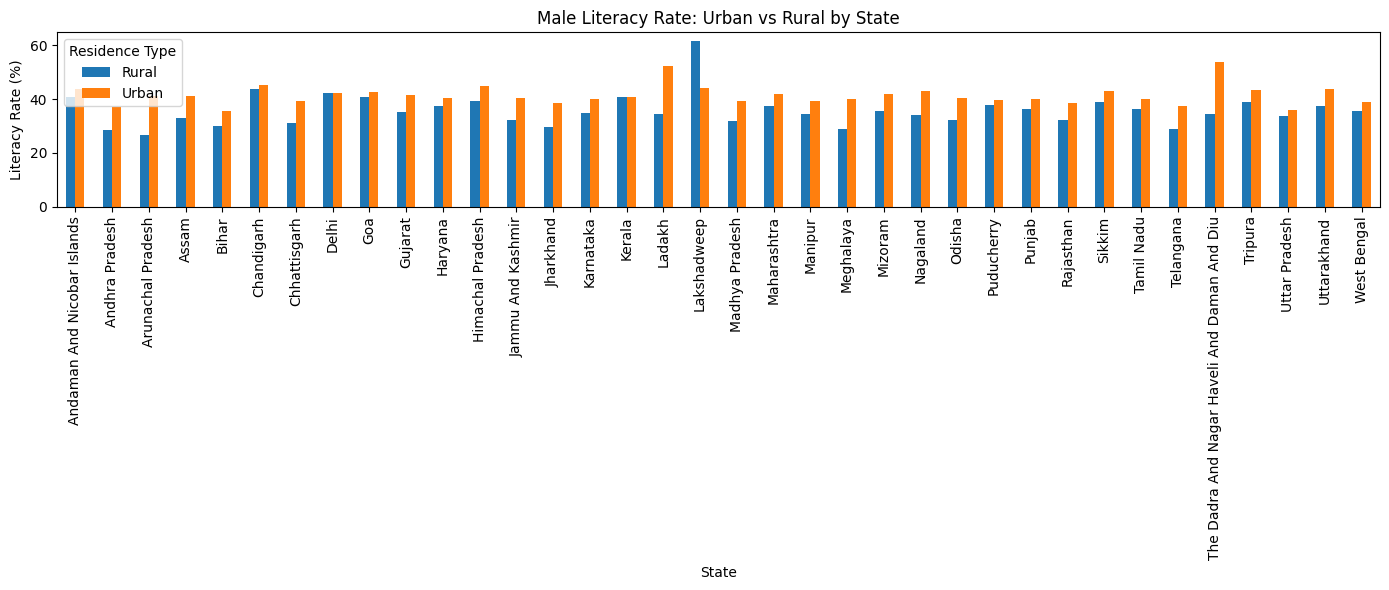

In [227]:
comparison['Male Literacy Rate'].plot(
    kind='bar',
    figsize=(14,6)
)

plt.title('Male Literacy Rate: Urban vs Rural by State')
plt.ylabel('Literacy Rate (%)')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


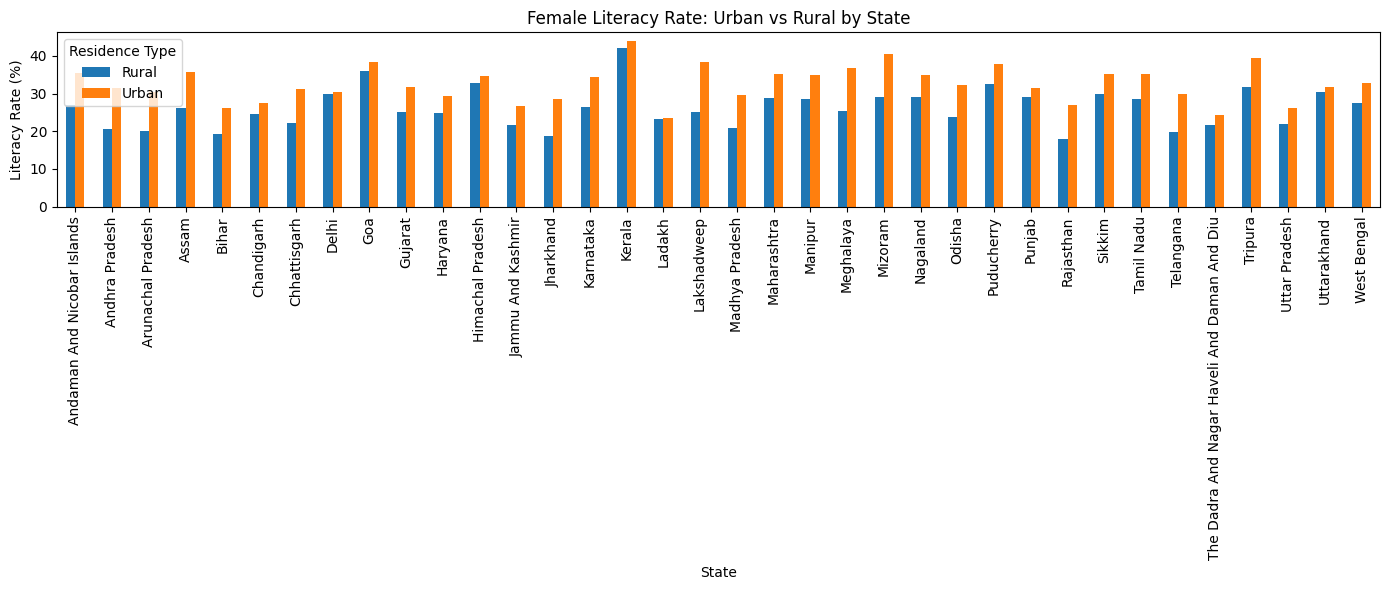

In [228]:
comparison['Female Literacy Rate'].plot(
    kind='bar',
    figsize=(14,6)
)

plt.title('Female Literacy Rate: Urban vs Rural by State')
plt.ylabel('Literacy Rate (%)')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

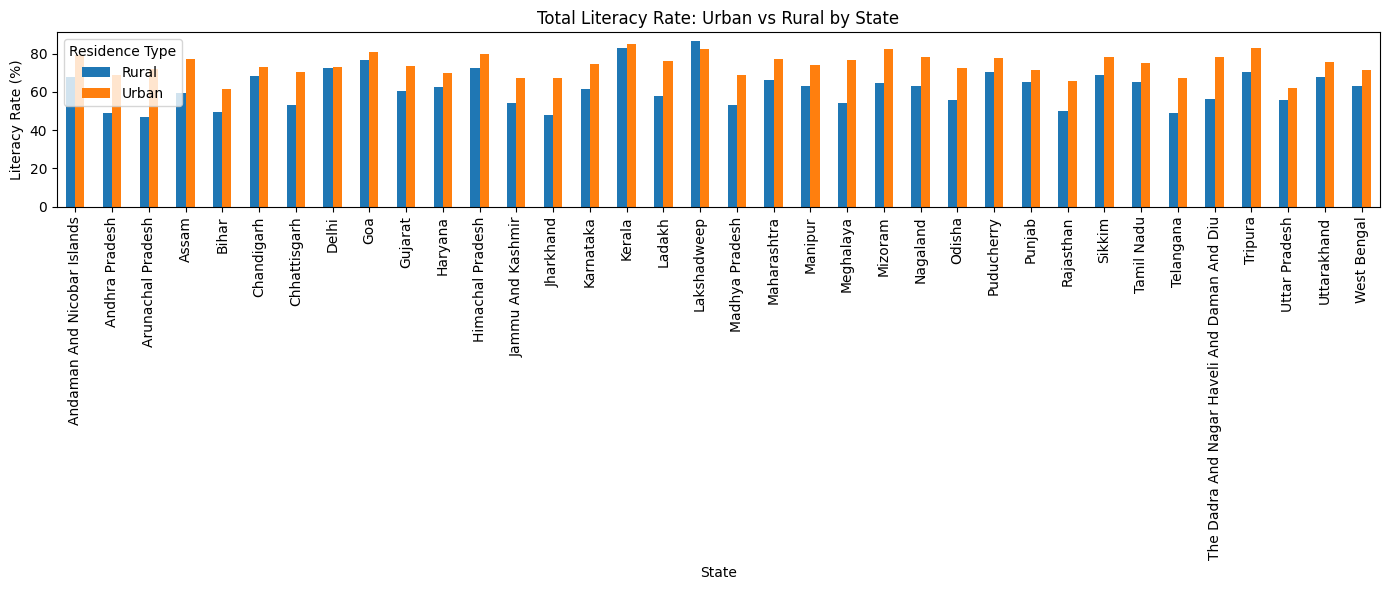

In [229]:
comparison['Total Literacy Rate'].plot(
    kind='bar',
    figsize=(14,6)
)

plt.title('Total Literacy Rate: Urban vs Rural by State')
plt.ylabel('Literacy Rate (%)')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### 2. Which state has the highest disparity between urban and rural areas?

In [230]:
pivot = (df
         .pivot_table(
             index='State',
             columns='Residence Type',
             values='Total Literacy Rate',
             aggfunc='mean'
         )
    )
print(pivot.head())

Residence Type                   Rural      Urban
State                                            
Andaman And Nicobar Islands  67.950331  79.424117
Andhra Pradesh               49.163194  68.536281
Arunachal Pradesh            46.821284  71.743500
Assam                        59.151650  76.984454
Bihar                        49.309454  61.572176


In [231]:
pivot['Urban_Rural_Disparity'] = pivot['Urban'] - pivot['Rural']
print('Pivot with Urban-Rural Disparity calculated:\n', pivot['Urban_Rural_Disparity'].head())

Pivot with Urban-Rural Disparity calculated:
 State
Andaman And Nicobar Islands    11.473786
Andhra Pradesh                 19.373087
Arunachal Pradesh              24.922216
Assam                          17.832804
Bihar                          12.262722
Name: Urban_Rural_Disparity, dtype: float64


In [232]:
State = pivot['Urban_Rural_Disparity'].idxmax()
Value = pivot['Urban_Rural_Disparity'].max()
print('The State with highest disparity is:{}\n The value of disparity is:{}'.format(State, Value))

The State with highest disparity is:Arunachal Pradesh
 The value of disparity is:24.922215972562917


##### 3. Also plot 2 graphs for male and female population showing combined literacy rates for each state

In [233]:
pivot_gender = df.pivot_table(
    index='State',
    columns='Residence Type',   # Urban / Rural
    values=['Male Literacy Rate', 'Female Literacy Rate'],
    aggfunc='mean'
)

pivot_gender['Male_Combined_Rate'] = (
    pivot_gender['Male Literacy Rate']['Urban']
    - pivot_gender['Male Literacy Rate']['Rural']
)

pivot_gender['Female_Combined_Rate'] = (
    pivot_gender['Female Literacy Rate']['Urban']
    - pivot_gender['Female Literacy Rate']['Rural']
)
print(pivot_gender.head())
print(pivot_gender['Male_Combined_Rate'])
print(pivot_gender['Female_Combined_Rate'])

                            Female Literacy Rate             \
Residence Type                             Rural      Urban   
State                                                         
Andaman And Nicobar Islands            27.066825  35.485297   
Andhra Pradesh                         20.714801  31.460290   
Arunachal Pradesh                      20.079822  30.398209   
Assam                                  26.165329  35.797618   
Bihar                                  19.377322  26.117979   

                            Male Literacy Rate            Male_Combined_Rate  \
Residence Type                           Rural      Urban                      
State                                                                          
Andaman And Nicobar Islands          40.883506  43.938820           3.055315   
Andhra Pradesh                       28.448393  37.075991           8.627598   
Arunachal Pradesh                    26.741463  41.345291          14.603828   
Assam          

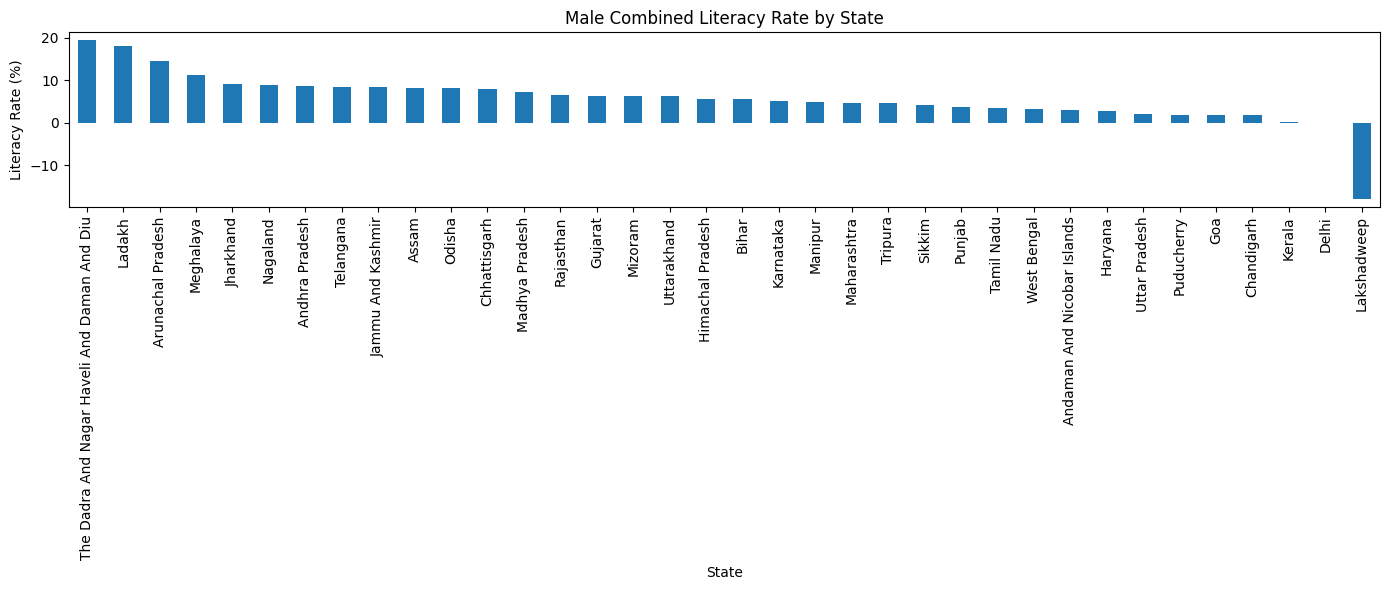

In [234]:
plt.figure(figsize=(14, 6))
pivot_gender['Male_Combined_Rate'].sort_values(ascending=False).plot(kind='bar')

plt.title('Male Combined Literacy Rate by State')
plt.ylabel('Literacy Rate (%)')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


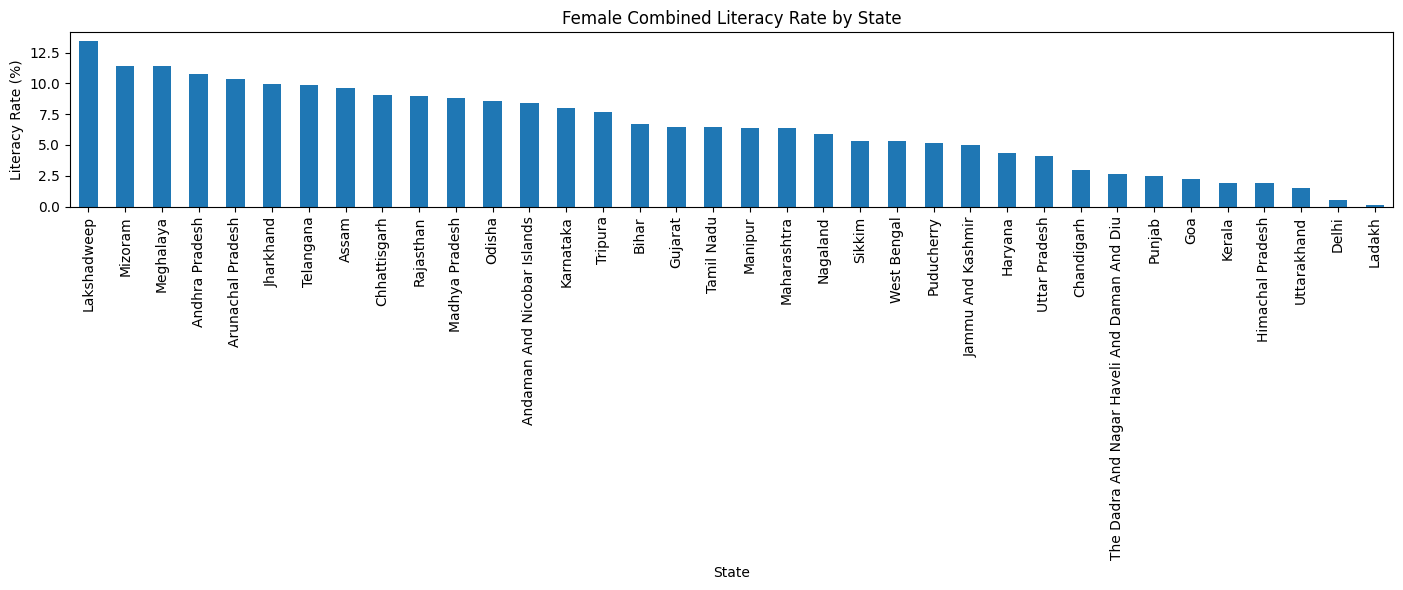

In [235]:
plt.figure(figsize=(14,6))
pivot_gender['Female_Combined_Rate'].sort_values(ascending=False).plot(kind='bar')  

plt.title('Female Combined Literacy Rate by State')
plt.ylabel('Literacy Rate (%)')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Task 2

1. What is the distribution of the working population (main and marginal workers) by sector (cultivators, agricultural labourers, household industry, other workers) and gender across different states?

In [236]:
state_df = df.groupby('State', as_index=False).sum(numeric_only=True)

In [237]:
main_male_cols = [
    'Number Of Male Main Workers As Cultivators',
    'Number Of Male Main Workers As Agricultural Labourers',
    'Number Of Male Main Workers In The Household Industry',
    'Number Of Male Main Workers As Other Workers'
]

main_female_cols = [
    'Number Of Female Main Workers As Cultivators',
    'Number Of Female Main Workers As Agricultural Labourers',
    'Number Of Female Main Workers In The Household Industry',
    'Number Of Female Main Workers As Other Workers'
]

In [238]:
marginal_male_cols = [
    'Number Of Male Marginal Workers As Cultivators',
    'Number Of Male Marginal Workers As Agricultural Labourers',
    'Number Of Male Marginal Workers In The Household Industry',
    'Number Of Male Marginal Workers As Other Workers'
]

marginal_female_cols = [
    'Number Of Female Marginal Workers As Cultivators',
    'Number Of Female Marginal Workers As Agricultural Labourers',
    'Number Of Female Marginal Workers In The Household Industry',
    'Number Of Female Marginal Workers As Other Workers'
]

In [239]:
def to_percentage(df, cols):
    pct = df[cols].div(df[cols].sum(axis=1), axis=0) * 100
    pct.index = df['State']
    pct.columns = [
        'Cultivators',
        'Agricultural Labourers',
        'Household Industry',
        'Other Workers'
    ]
    return pct

In [240]:
main_male_pct = to_percentage(state_df, main_male_cols)
main_female_pct = to_percentage(state_df, main_female_cols)

marginal_male_pct = to_percentage(state_df, marginal_male_cols)
marginal_female_pct = to_percentage(state_df, marginal_female_cols)

In [241]:
def plot_stacked(df, title):
    df.plot(kind='bar', stacked=True, figsize=(14,6))
    plt.title(title)
    plt.xlabel('State')
    plt.ylabel('Percentage of Workers')
    plt.xticks(rotation=90)
    plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

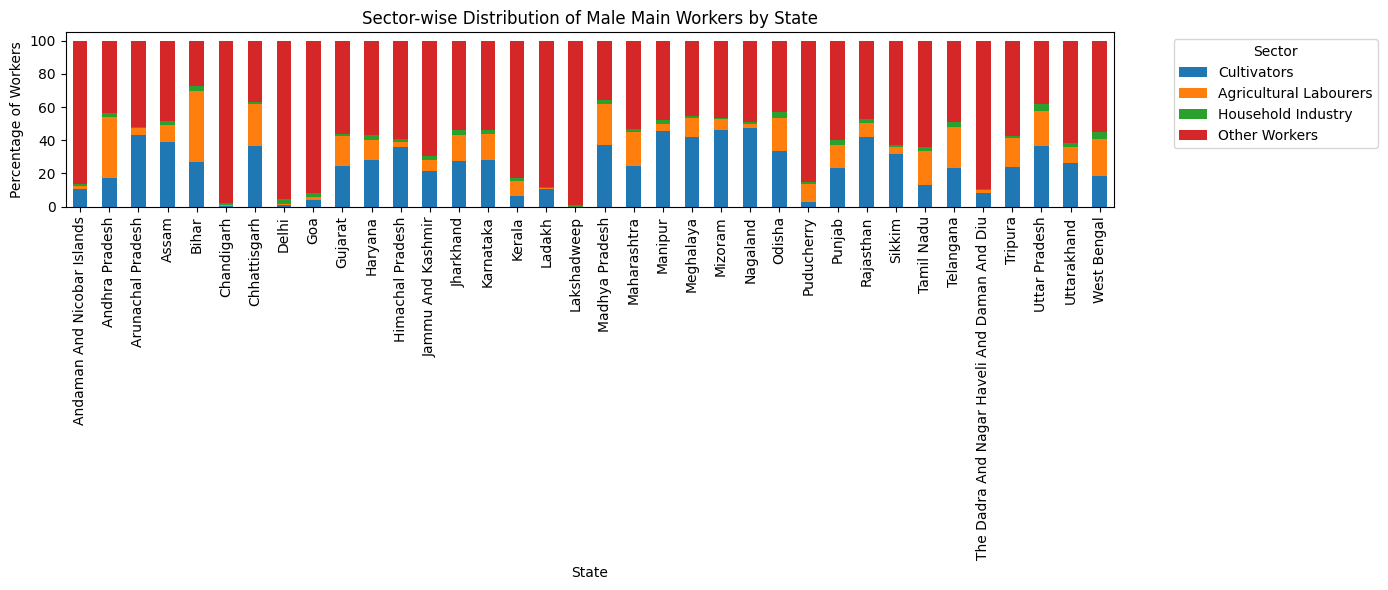

In [242]:
plot_stacked(
    main_male_pct,
    'Sector-wise Distribution of Male Main Workers by State'
)

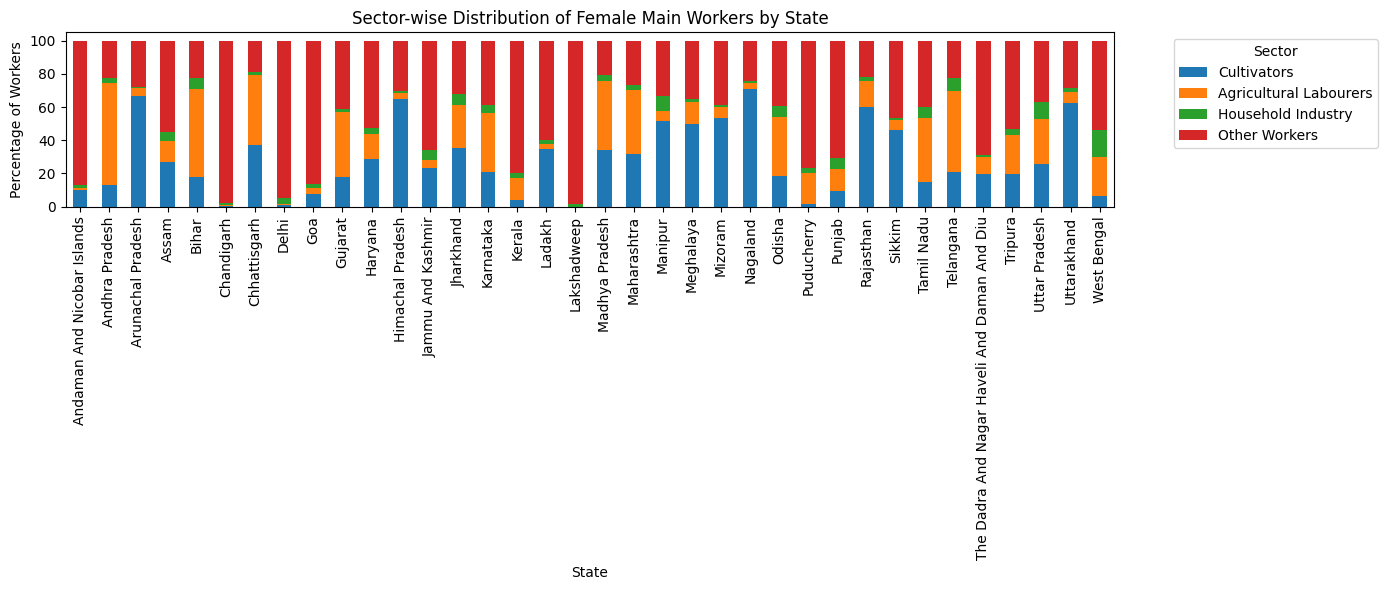

In [243]:
plot_stacked(
    main_female_pct,
    'Sector-wise Distribution of Female Main Workers by State'
)

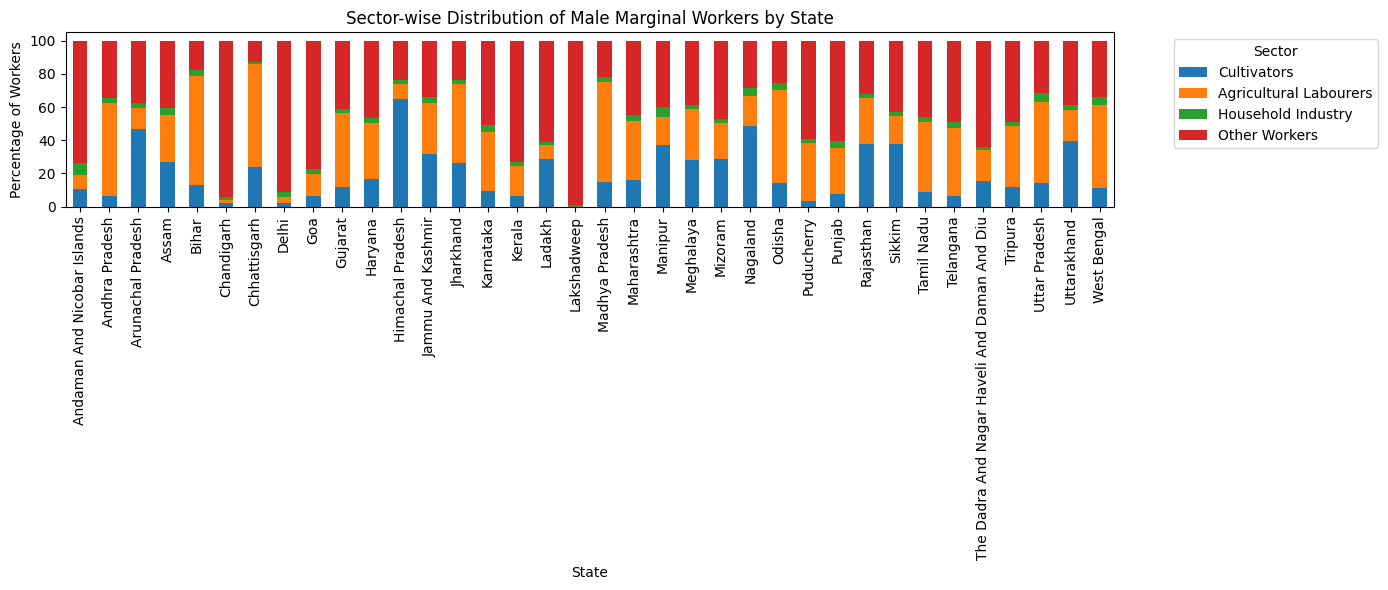

In [244]:
plot_stacked(
    marginal_male_pct,
    'Sector-wise Distribution of Male Marginal Workers by State'
)

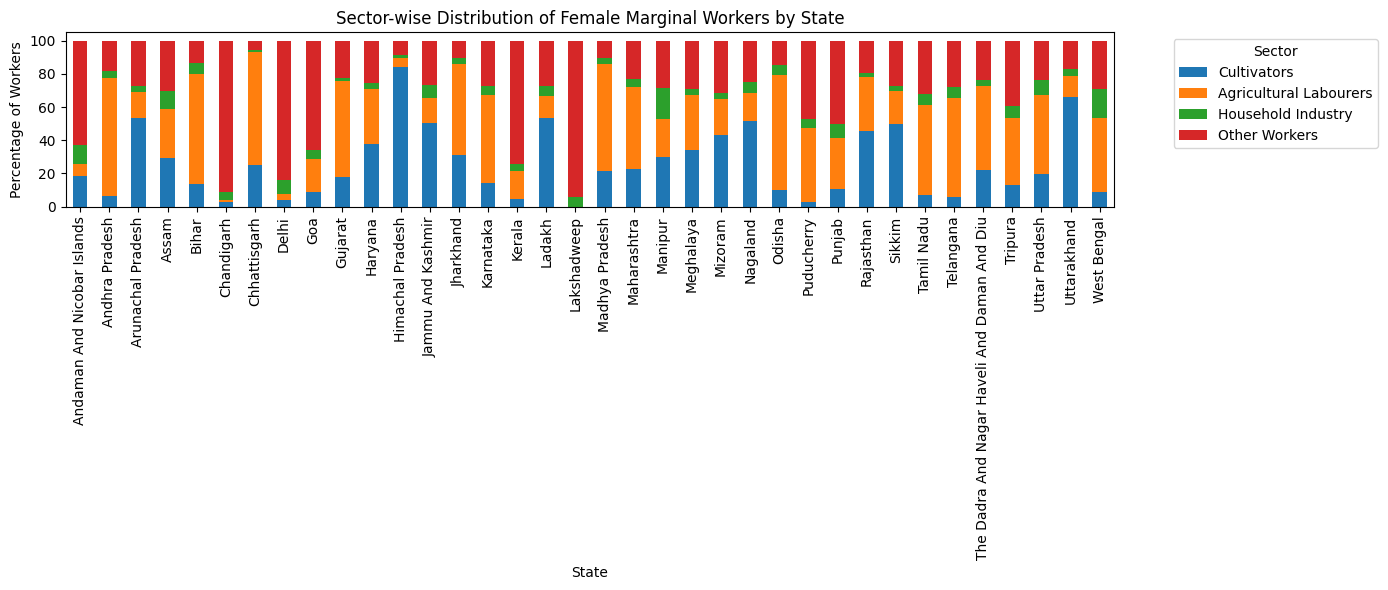

In [245]:
plot_stacked(
    marginal_female_pct,
    'Sector-wise Distribution of Female Marginal Workers by State'
)

##### 2. Plot a graph showing all these sectors together for top 5 states ranked by employment rate.

In [246]:
state_df['Employment Rate'] = df['Working Population'] / df['Population'] * 100
state_df.head()

,State,Households,Population,Male Population,Female Population,Population In The Age Group 0 To 6 Years,Male Population In The Age Group 0 To 6 Years,Female Population In The Age Group 0 To 6 Years,Scheduled Caste Population,Male Scheduled Caste Population,...,Number Of Marginal Workers As Other Workers Who Worked For 0 To 3 Months,Number Of Male Marginal Workers As Other Workers Who Worked For 0 To 3 Months,Number Of Female Marginal Workers As Other Workers Who Worked For 0 To 3 Months,Number Of Non Workers,Number Of Male Non Workers,Number Of Female Non Workers,Male Literacy Rate,Female Literacy Rate,Total Literacy Rate,Employment Rate
0,Andaman And Nicobar Islands,94551.0,380581.0,202871.0,177710.0,40878.0,20770.0,20108.0,0.0,0.0,...,3774.0,2576.0,1198.0,228046.0,81982.0,146064.0,1.640956e+04,10895.889345,2.730545e+04,44.137353
1,Andhra Pradesh,12718976.0,49577103.0,24830513.0,24746590.0,5243636.0,2697015.0,2546621.0,8469278.0,4219920.0,...,138518.0,72263.0,66255.0,26496139.0,10323095.0,16173044.0,4.794153e+05,350458.217020,8.298735e+05,59.836066
2,Arunachal Pradesh,270577.0,1383727.0,713912.0,669815.0,212188.0,107624.0,104564.0,0.0,0.0,...,4876.0,2708.0,2168.0,796070.0,363639.0,432431.0,1.417229e+05,106400.453708,2.481234e+05,28.109696
3,Assam,6305524.0,30771805.0,15715019.0,15056786.0,4599071.0,2343375.0,2255696.0,2206114.0,1132221.0,...,182154.0,95239.0,87040.0,18971451.0,7305301.0,11666150.0,8.469785e+05,672601.340475,1.519580e+06,99.042408
4,Bihar,18913565.0,104099452.0,54278157.0,49821295.0,19133964.0,9887239.0,9246725.0,16567325.0,8606253.0,...,342975.0,212562.0,130413.0,69374465.0,29055968.0,40318497.0,1.176735e+06,762432.049332,1.939167e+06,35.552913


In [247]:
top5_states = (
    state_df.sort_values('Employment Rate', ascending=False)
            .head(5))
top5_states

,State,Households,Population,Male Population,Female Population,Population In The Age Group 0 To 6 Years,Male Population In The Age Group 0 To 6 Years,Female Population In The Age Group 0 To 6 Years,Scheduled Caste Population,Male Scheduled Caste Population,...,Number Of Marginal Workers As Other Workers Who Worked For 0 To 3 Months,Number Of Male Marginal Workers As Other Workers Who Worked For 0 To 3 Months,Number Of Female Marginal Workers As Other Workers Who Worked For 0 To 3 Months,Number Of Non Workers,Number Of Male Non Workers,Number Of Female Non Workers,Male Literacy Rate,Female Literacy Rate,Total Literacy Rate,Employment Rate
27,Rajasthan,12688355.0,68425124.0,35485738.0,32939386.0,10631640.0,5629537.0,5002103.0,12203834.0,6346208.0,...,445513.0,163559.0,281954.0,38576139.0,17220105.0,21356034.0,1.404636e+06,784913.051045,2.189549e+06,100.000000
20,Manipur,557859.0,2855794.0,1438586.0,1417208.0,375357.0,194484.0,180873.0,97328.0,48863.0,...,16899.0,7090.0,9809.0,1551184.0,699178.0,852006.0,8.878436e+04,73825.454270,1.626098e+05,100.000000
25,Puducherry,302450.0,1247953.0,612511.0,635442.0,132858.0,67527.0,65331.0,196325.0,95512.0,...,4618.0,2831.0,1787.0,802985.0,279580.0,523405.0,3.848285e+03,3353.514927,7.201800e+03,100.000000
3,Assam,6305524.0,30771805.0,15715019.0,15056786.0,4599071.0,2343375.0,2255696.0,2206114.0,1132221.0,...,182154.0,95239.0,87040.0,18971451.0,7305301.0,11666150.0,8.469785e+05,672601.340475,1.519580e+06,99.042408
31,The Dadra And Nagar Haveli And Daman And Diu,137414.0,586956.0,344061.0,242895.0,77829.0,40575.0,37254.0,12310.0,6490.0,...,2355.0,1783.0,572.0,308524.0,117334.0,191190.0,3.636317e+03,2164.982666,5.801299e+03,96.521739


In [248]:
sector_cols = {
    'Cultivators':
          state_df['Number Of Main Workers As Cultivators'] + state_df['Number Of Marginal Workers As Cultivators'],
    'Agricultural Labourers':
            state_df['Number Of Main Workers As Agricultural Labourers'] + state_df['Number Of Marginal Workers As Agricultural Labourers'],
    'Household Industry':
            state_df['Number Of Main Workers In The Household Industry'] + state_df['Number Of Marginal Workers In The Household Industry'],
    'Other Workers':
            state_df['Number Of  Main Workers As Other Workers'] + state_df['Number Of Marginal Workers As Other Workers']
            }

In [249]:
sector_df = pd.DataFrame(sector_cols)
sector_df['State'] = state_df['State']

sector_top5 = sector_df[sector_df['State'].isin(top5_states['State'])]
sector_top5.set_index('State', inplace=True)

sector_top5 = sector_top5.div(sector_top5.sum(axis=1), axis=0) * 100

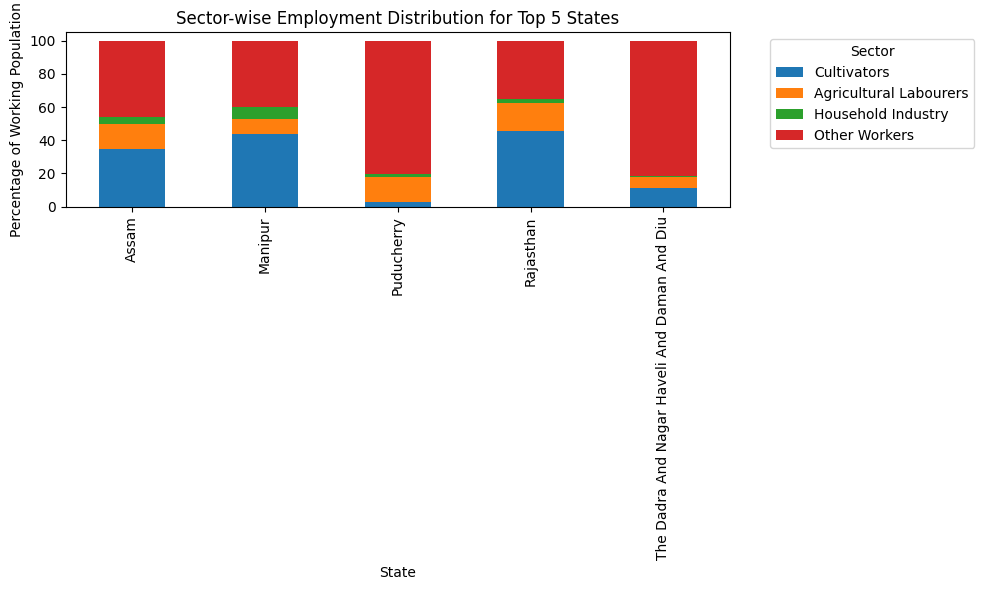

In [250]:
sector_top5.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6)
)

plt.title('Sector-wise Employment Distribution for Top 5 States')
plt.xlabel('State')
plt.ylabel('Percentage of Working Population')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()